In [10]:
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
import statsmodels.tsa.api as sm

%run myPlots.ipynb

x.shape = (5000, 7)


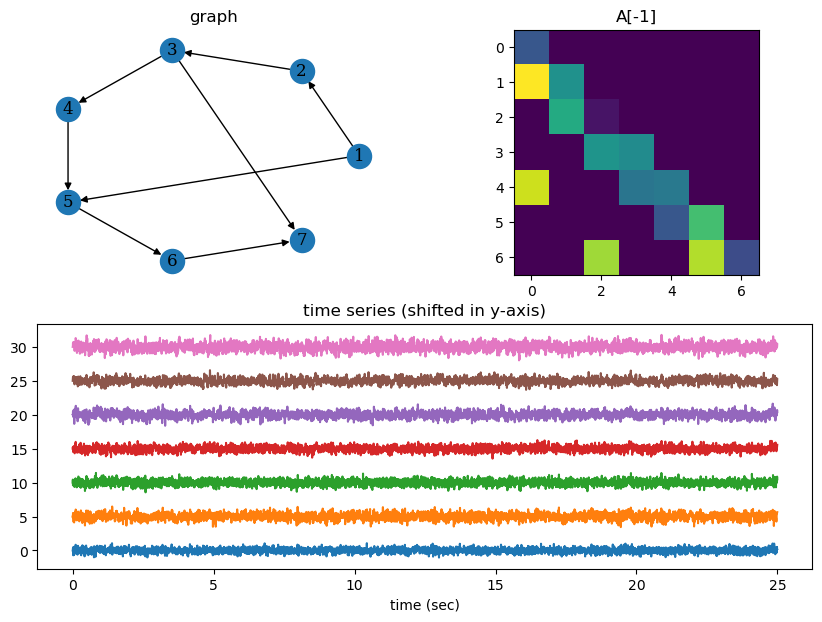

In [42]:
n = 5000
m = 7
fs = 200
dt = 1/fs
t  = np.arange(0, n*dt, dt)
df = 1/(n*dt)

p = 1

A = np.zeros([p, m, m])
for i in range(p):
    A[i] = -np.eye(m)/3
A[p-1] = np.array([[0.21, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
                 [0.77, 0.39, 0.  , 0.  , 0.  , 0.  , 0.  ],
                 [0.  , 0.47, 0.04, 0.  , 0.  , 0.  , 0.  ],
                 [0.  , 0.  , 0.4 , 0.37, 0.  , 0.  , 0.  ],
                 [0.71, 0.  , 0.  , 0.3 , 0.31, 0.  , 0.  ],
                 [0.  , 0.  , 0.  , 0.  , 0.21, 0.54, 0.  ],
                 [0.  , 0.  , 0.66, 0.  , 0.  , 0.68, 0.18]])

noise = np.random.multivariate_normal(np.zeros(m), np.eye(m)*0.1, size=n)

x = np.zeros([n,m])
for i in range(p,n):
    x[i,:] = noise[i,:]
    for l in range(p):
        x[i,:] += A[l,:,:]@x[i-l-1,:]


figure(figsize=[10,7])
subplot(221)
graph_show(A[l] - np.diag(np.diag(A[l])))
title(f"graph")
subplot(222)
imshow(A[l])
title(f"A[-{l+1}]")
subplot(212)
print(f"x.shape = {x.shape}")
plot(t, x+np.arange(m)*5)
title(f"time series (shifted in y-axis)")
xlabel(f"time (sec)")
show()

In [43]:
%run FC_Methods.ipynb

FC_measures = {'Corr'    : Corr_func,
               'PCorr'   : PCorr_func,
               'Prec'    : Prec_func,
               'MI'      : MI_func,
               '0-lagReg': ZeroLagReg_func,
               'pwGC'    : pwGC_func,
               'GGC'     : GGC_func,
               'Coh'     : Coh_func,
               'MVCoh'   : MVCoh_func,
               'PCoh'    : PCoh_func,
               'DCoh'    : DCoh_func,
               'PDCoh'   : PDCoh_func,
               'DTF'     : DTF_func,
               }

MEASUREs = FC_measures.keys()

In [44]:
FC = {}

for measure in MEASUREs:
# for measure in ['pwGC', 'GGC']:
    print(f"computing '{measure}'!")
    FC[measure] = FC_measures[measure](x)
    # FC[measure] = FC_measures[measure](x, maxLag = 10, Oselec_method='bic', show_order_selection_results=True)
    FC[measure] -= np.diag(np.diag( FC[measure] ))
    
MEASUREs = FC.keys()

computing 'Corr'!
computing 'PCorr'!
computing 'Prec'!
computing 'MI'!
computing '0-lagReg'!
computing 'pwGC'!
computing 'GGC'!
computing 'Coh'!
computing 'MVCoh'!
computing 'PCoh'!
computing 'DCoh'!
computing 'PDCoh'!
computing 'DTF'!


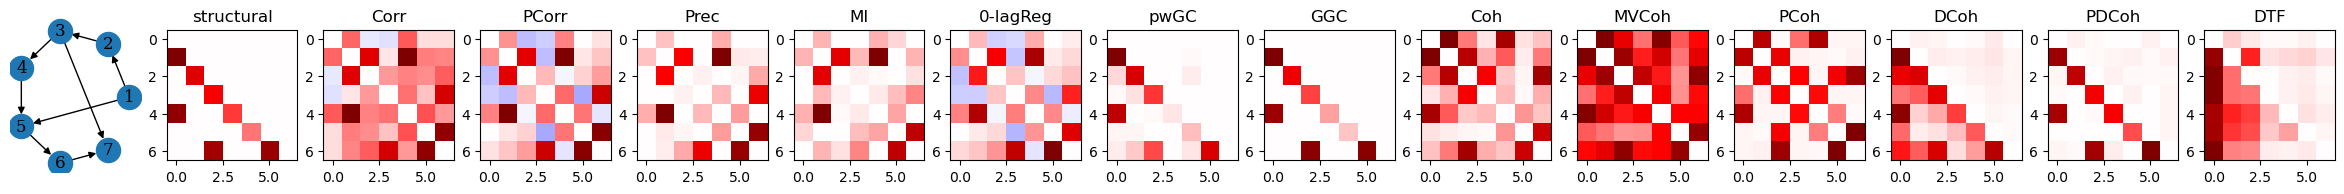

In [45]:
figure(figsize=[30,2])
subplot(1, len(MEASUREs)+2, 1)  
graph_show(A[-1] - np.diag(np.diag(A[-1])))

subplot(1, len(MEASUREs)+2, 2)
lmt = np.max(abs(A[-1] - np.diag(np.diag(A[-1]))))
imshow(A[-1] - np.diag(np.diag(A[-1])), vmax=lmt, vmin=-lmt, cmap="seismic")
title(f"structural")

for i, measure  in enumerate(MEASUREs):
    subplot(1, len(MEASUREs)+2, i+3)
    lmt = np.max(abs(FC[measure]))
    imshow(FC[measure], vmax=lmt, vmin=-lmt, cmap="seismic")
    title(f"{measure}")
    
show()